In [1]:
import numpy as np
import os
from utils.input_data import read_data_sets
import utils.datasets as ds
import utils.augmentation as aug
import utils.helper as hlp

In [2]:
dataset = "CBF"

nb_class = ds.nb_classes(dataset)
nb_dims = ds.nb_dims(dataset)

In [3]:
# Load Data
train_data_file = os.path.join("data", dataset, "%s_TRAIN.tsv"%dataset)
test_data_file = os.path.join("data", dataset, "%s_TEST.tsv"%dataset)

x_train, y_train, x_test, y_test = read_data_sets(train_data_file, "", test_data_file, "", delimiter="\t")

y_train = ds.class_offset(y_train, dataset)
y_test= ds.class_offset(y_test, dataset)
nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps , nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
# Test is secret
x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.

x_test = x_test.reshape((-1, input_shape[0], input_shape[1])) 
x_train = x_train.reshape((-1, input_shape[0], input_shape[1])) 

## Original

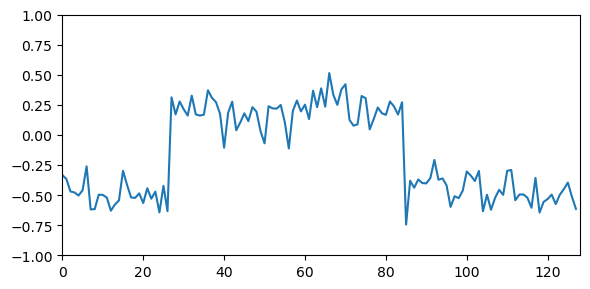

In [4]:
hlp.plot1d(x_train[0])

## Jittering

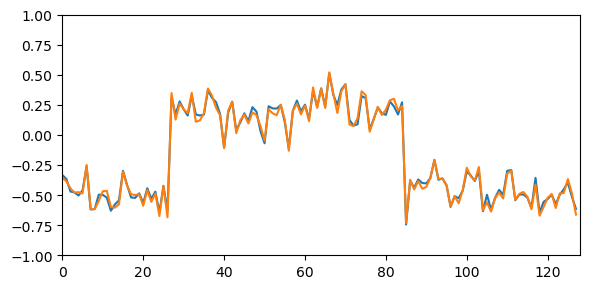

In [5]:
hlp.plot1d(x_train[0], aug.jitter(x_train)[0])

In [6]:
## Scaling

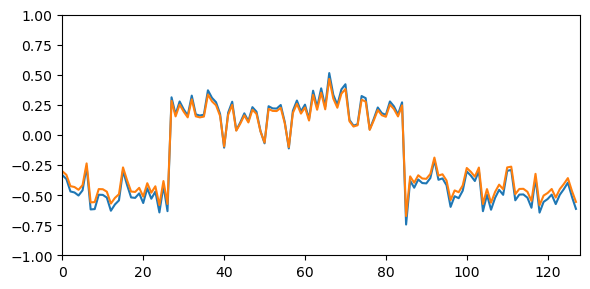

In [7]:
hlp.plot1d(x_train[0], aug.scaling(x_train)[0])

In [10]:
## Magnitude Warping

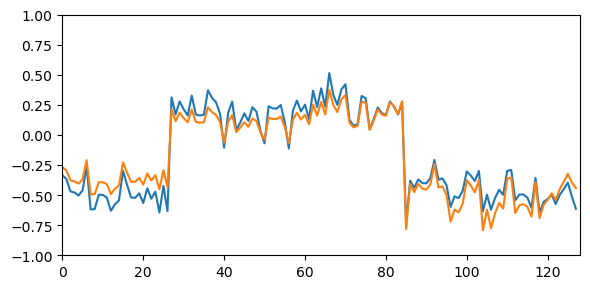

In [12]:
hlp.plot1d(x_train[0], aug.magnitude_warp(x_train)[0])

In [12]:
## Time Warping

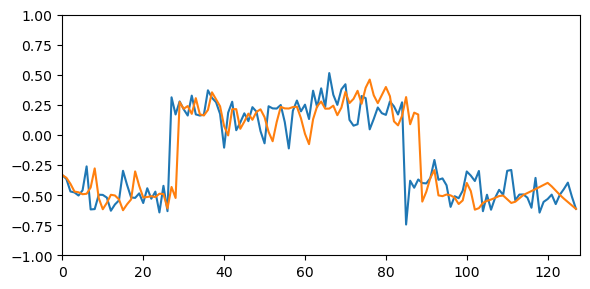

In [23]:
hlp.plot1d(x_train[0], aug.time_warp(x_train)[0])

In [17]:
## Rotation

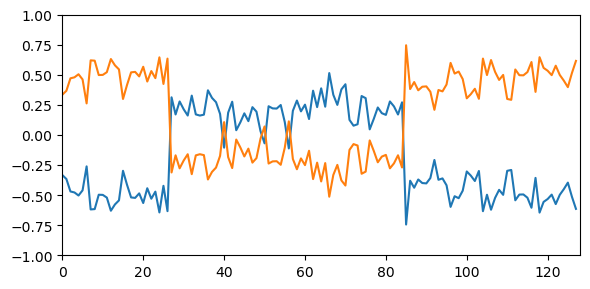

In [18]:
hlp.plot1d(x_train[0], aug.rotation(x_train)[0])

In [16]:
## Window Slicing

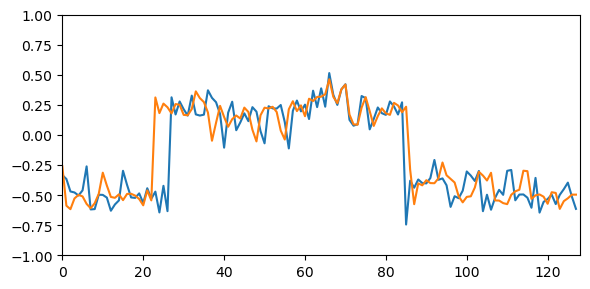

In [24]:
hlp.plot1d(x_train[0], aug.window_slice(x_train)[0])

In [18]:
## Window Warping

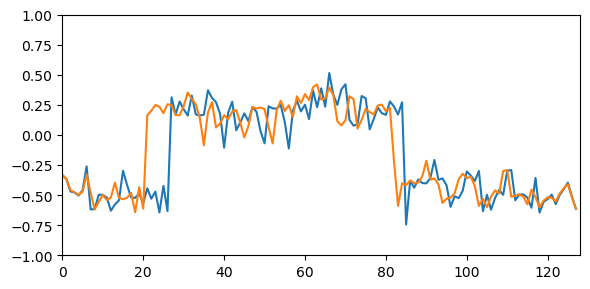

In [25]:
hlp.plot1d(x_train[0], aug.window_warp(x_train)[0])

In [20]:
## Suboptimal Warping Time Series Generator (SPAWNER)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 157.47it/s]


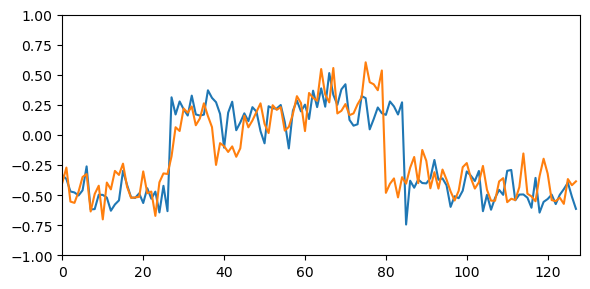

In [26]:
hlp.plot1d(x_train[0], aug.spawner(x_train, y_train)[0])

In [22]:
## Weighted Dynamic Time Series Barycenter Averaging (wDBA)

100%|██████████| 30/30 [00:05<00:00,  5.11it/s]


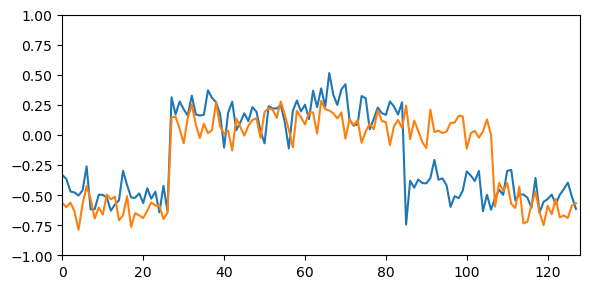

In [28]:
hlp.plot1d(x_train[0], aug.wdba(x_train, y_train)[0])

In [24]:
## Random Guided Warping

100%|██████████| 30/30 [00:00<00:00, 66.69it/s]


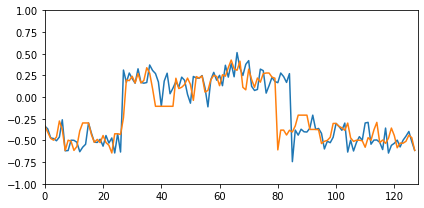

In [25]:
hlp.plot1d(x_train[0], aug.random_guided_warp(x_train, y_train)[0])

In [26]:
## Discriminative Guided Warping

100%|██████████| 30/30 [00:02<00:00, 12.30it/s]


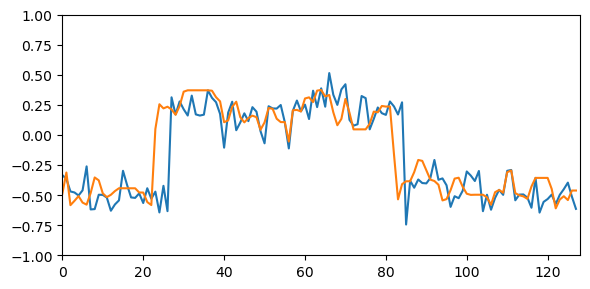

In [31]:
hlp.plot1d(x_train[0], aug.discriminative_guided_warp(x_train, y_train)[0])